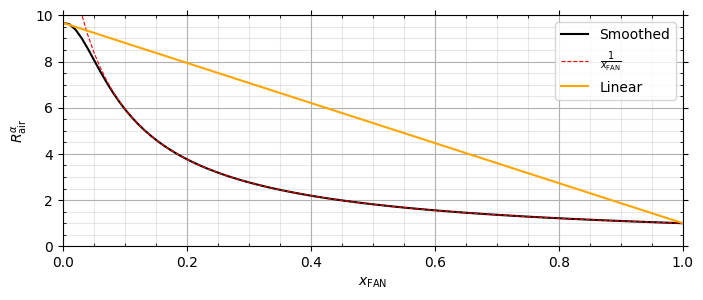

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define parameters
a = 0.07
b = 7/107
c = 5
d = 45

y_int = c + (1/a + b - c) * 0.5
y_1 = c + (1/(1+a) + b - c) / (1 + np.exp(-d))

# Define the functions
def inverse_function(x):
    return 1 / (x + a) + b

def smooth_function(x):
    return c + (inverse_function(x)- c) / (1 + np.exp(-d * x))

# Linear function: R(x) = q + mx
R0 = smooth_function(0)
R1 = smooth_function(1)
q = R0
m = R1 - R0
def linear_smooth_function(x):
    return q + m*x

# Generate x values and compute y values for the function
x_values = np.linspace(0, 1, 100)
x_values2 = np.linspace(0.01, 1, 100)
y_values = smooth_function(x_values)
y_lin_values = linear_smooth_function(x_values)

# Plot the function
plt.figure(figsize=(8, 3))
plt.plot(x_values, y_values, c='black', label='Smoothed')
plt.plot(x_values2, inverse_function(x_values2), c='red', label=r'$\frac{1}{x_\mathrm{FAN}}$', linestyle='--', linewidth=0.8)
plt.plot(x_values, y_lin_values, c='orange', label='Linear')
plt.xlabel(r'$x_\mathrm{FAN}$')
plt.ylabel(r'$R_\mathrm{air}^\alpha$')
plt.xlim(0, 1)
plt.ylim(0, 10)

# Add gridlines and minor ticks
ax = plt.gca()  # Get the current axis
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.grid(which='both')
ax.grid(which='minor', alpha=0.3)
ax.tick_params(axis='x', which='minor', direction='in', top=True)
ax.tick_params(axis='y', which='minor', direction='in', left=True, right=True)
ax.tick_params(axis='x', which='major', top=True)
ax.tick_params(axis='y', which='major', left=True, right=True)

plt.legend()
plt.savefig('fan_fitting.pdf', bbox_inches='tight')
plt.show()

In [6]:
# Save coefficients
data = pd.DataFrame({'a': [a], 'b': [b], 'c': [c], 'd': [d]})
data.to_csv('fan_coefficients.csv', index=False)

data_linear = pd.DataFrame({'q': [q], 'm': [m]})
data_linear.to_csv('fan_linear_coefficients.csv', index=False)